# Training Models

In [1]:
import pandas as pd 
import os
import sys

sys.path.append(os.path.abspath('..'))

from app.model import vectorize_text, train_model, train_model_emotions, evaluate_model

import joblib
from sklearn.model_selection import train_test_split


 Training model: SVM
Best parameters for svm model: {'C': 0.1, 'dual': True, 'loss': 'squared_hinge'}
Best cross-validation score: 0.8777
Accuracy: 0.8734

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2500
           1       0.86      0.89      0.88      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



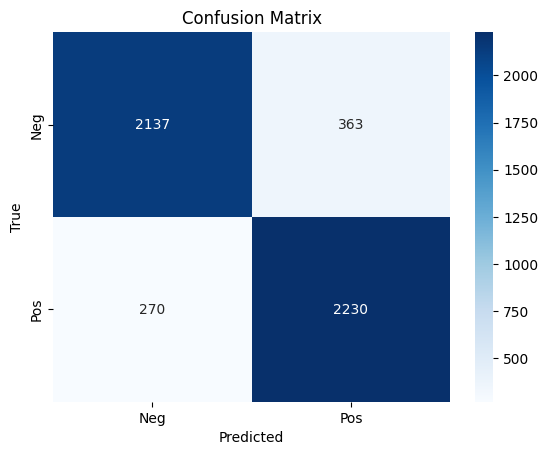


 Training model: RANDOM_FOREST
Best parameters for random_forest model: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8402
Accuracy: 0.8412

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2500
           1       0.84      0.85      0.84      2500

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



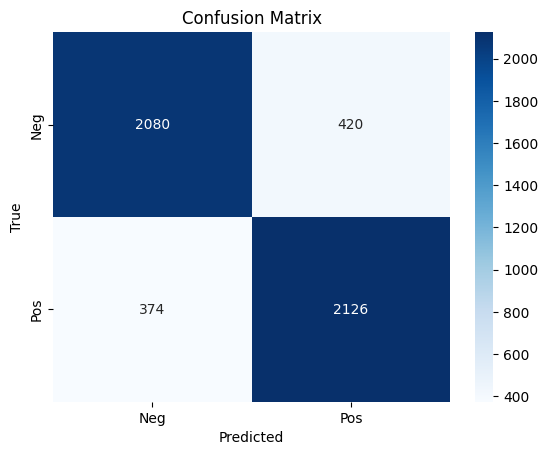


 Training model: XGBOOST
Best parameters for xgboost model: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best cross-validation score: 0.8217
Accuracy: 0.8192

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2500
           1       0.79      0.86      0.83      2500

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



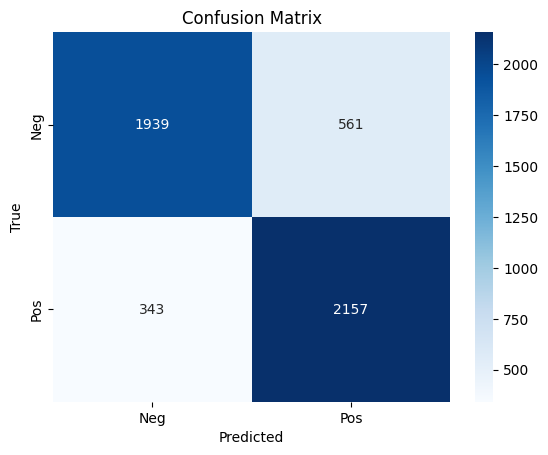


Best model: svm with accuracy: 0.8734


['../models/vectorizer.joblib']

In [ ]:
df = pd.read_csv('../data/preprocessed/imdb_reviews_train_clean.csv')


X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

best_accuracy = 0.0
best_model = None
best_model_name = None


for model_name in ['svm', 'random_forest', 'xgboost']:
    print(f"\n Training model: {model_name.upper()}")
    model, best_parms = train_model(X_train_vect, y_train, model_type=model_name)
    acc = evaluate_model(model, X_test_vect, y_test)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = model_name
        
print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")
joblib.dump(best_model, '../models/best_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer.joblib')

In [ ]:
df = pd.read_csv('../data/preprocessed/goemotions_train_positive_clean.csv')

X_train, X_test, y_train, y_test = train_test_split(
    df['text_clean'], df['emotion'], test_size=0.2, stratify=df['emotion'], random_state=42
)

X_train = X_train.fillna("")
X_test = X_test.fillna("")

X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

best_accuracy = 0.0
best_model = None
best_model_name = None


for model_name in ['logistic', 'naive_bayes', 'svm', 'random_forest', 'xgboost']:
    print(f"\n Training model: {model_name.upper()}")
    model = train_model_emotions(X_train_vect, y_train, model_type=model_name)
    acc = evaluate_model(model, X_test_vect, y_test)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = model_name
        
print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")
joblib.dump(best_model, '../models/positive_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer_positive.joblib')


 Training model: LOGISTIC


TypeError: cannot unpack non-iterable OneVsRestClassifier object

In [ ]:
df = pd.read_csv('../data/preprocessed/goemotions_train_negative_clean.csv')

X_train, X_test, y_train, y_test = train_test_split(
    df['text_clean'], df['emotion'], test_size=0.2, stratify=df['emotion'], random_state=42
)

X_train_vect, X_test_vect, vectorizer = vectorize_text(X_train, X_test)

best_accuracy = 0.0
best_model = None
best_model_name = None


for model_name in ['logistic', 'naive_bayes', 'svm', 'random_forest', 'xgboost']:
    print(f"\n Training model: {model_name.upper()}")
    model, best_parms = train_model(X_train_vect, y_train, model_type=model_name)
    acc = evaluate_model(model, X_test_vect, y_test)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = model_name
        
print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")
joblib.dump(best_model, '../models/negative_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer_negative.joblib')